In [1]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import MaxPool2D, Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [5]:
model = keras.Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = (28,28,1), padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [7]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs= 3)

Epoch 1/3
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3310 - accuracy: 0.9367 - val_loss: 0.0854 - val_accuracy: 0.9722
Epoch 2/3
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0750 - accuracy: 0.9773 - val_loss: 0.0660 - val_accuracy: 0.9793
Epoch 3/3
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0603 - accuracy: 0.9816 - val_loss: 0.0535 - val_accuracy: 0.9844


In [8]:
y_hat = model.predict(x_test[10:20])
y_hat

1/1 [==============================] - 0s 74ms/step


array([[1.00000000e+00, 2.45284497e-20, 6.54063204e-09, 2.43207174e-13,
        4.98568675e-15, 2.55436649e-13, 1.09048024e-08, 3.61620391e-12,
        2.85115709e-09, 3.02631809e-09],
       [3.68166653e-08, 3.33578184e-17, 2.20243305e-14, 2.71289491e-15,
        1.75424982e-13, 2.15666068e-10, 1.00000000e+00, 9.14459282e-20,
        1.07287269e-10, 2.13374111e-16],
       [1.04195950e-08, 1.86623449e-14, 6.41213298e-12, 3.23907194e-08,
        1.09752684e-04, 1.56678510e-08, 2.87346785e-10, 4.33040395e-06,
        2.28800286e-06, 9.99883533e-01],
       [1.00000000e+00, 8.23769578e-19, 1.57224997e-10, 1.44579664e-14,
        6.41610314e-14, 1.33762749e-11, 2.32863275e-08, 2.06408824e-13,
        2.12088236e-09, 1.03401865e-08],
       [3.52025893e-08, 9.99936461e-01, 3.19341664e-09, 2.04101298e-07,
        5.96890277e-06, 2.55040663e-06, 3.37595361e-06, 2.65120264e-07,
        5.11098042e-05, 4.52236115e-08],
       [6.51604828e-14, 1.16113030e-17, 8.83028473e-17, 1.28021871e-10,
   

In [12]:
y_label = np.argmax(y_hat, axis=1)
y_label

array([0, 6, 9, 0, 1, 5, 9, 7, 3, 4], dtype=int64)

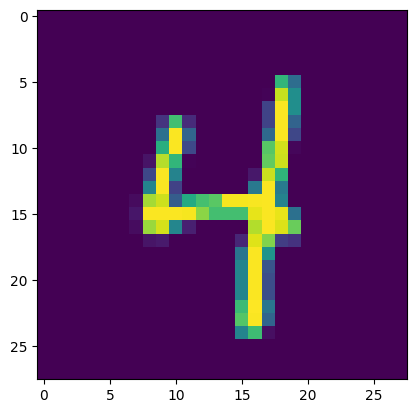

In [17]:
(x_train, y_train), (x_test1, y_test) = mnist.load_data()
plt.imshow(x_test1[19])


In [18]:
model.save("mnist3.hdf5")

In [127]:
# import tensorflow as tf
# img = tf.keras.utils.load_img(path="6.jpeg", color_mode= 'grayscale')
# img = tf.keras.utils.img_to_array(img)
# plt.imshow(tf.keras.utils.array_to_img(img), cmap="gray")
# test_img = img.reshape((1, 28, 28, 1))
# # model.predict(test_img)
# # img_class = model.predict_classes(test_img)
# img_class = np.argmax(model.predict(test_img), axis = 1)
# prediction = img_class[0]
# prediction